In [ ]:
TRAIN DELAY ANALYSIS

In [ ]:
# Objective

The primary objective of this project is to conduct a comprehensive analysis of historical train delay data using python. 
This analysis aims to identify patterns in train delays related to time of day, weather conditions, and distance between stations. Additionally, it seeks to assess the impact of different congestion levels (Low, Medium, High) on delays across various train types and to investigate the correlation between weather conditions and train punctuality. 
Furthermore, the project will evaluate how the distance of train routes relates to delay times, with the goal of optimizing scheduling and operational efficiency to reduce delays. 
By equipping stakeholders with data-driven insights, the project intends to support informed decision-making regarding resource allocation and service enhancements. 
Ultimately, it aims to enhance the overall travel experience for passengers, establish performance benchmarks for future assessments, visualize key metrics through an interactive visuals, and explore predictive analytics to forecast future delays. 
Through these objectives, the project aspires to provide actionable insights that can lead to significant improvements in train operations and customer satisfaction.

In [125]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# importing the dataset

df = pd.read_csv("C:/Users/sneha/OneDrive/Documents/DANLC LAB/train delay analysis data/train delay data.csv")
print("data imported successfully!")

data imported successfully!


In [7]:
# loading the dataset

print(df)
print("data loaded successfully!")

      Distance Between Stations (km) Weather Conditions Day of the Week  \
0                                100              Clear          Monday   
1                                150              Rainy         Tuesday   
2                                200              Foggy       Wednesday   
3                                 50              Clear        Thursday   
4                                 75              Rainy          Friday   
...                              ...                ...             ...   
2873                             945              Clear         Tuesday   
2874                             925              Rainy       Wednesday   
2875                             950              Foggy        Thursday   
2876                             930              Clear          Friday   
2877                             955              Rainy        Saturday   

     Time of Day Train Type  Historical Delay (min) Route Congestion  
0        Morning    Express 

In [15]:
# list of first five rows

df.head()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
0,100,Clear,Monday,Morning,Express,5,Low
1,150,Rainy,Tuesday,Afternoon,Superfast,10,Medium
2,200,Foggy,Wednesday,Evening,Local,15,High
3,50,Clear,Thursday,Night,Express,2,Low
4,75,Rainy,Friday,Morning,Superfast,8,Medium


In [19]:
# list of last five rows

df.tail()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
2873,945,Clear,Tuesday,Night,Local,1210,Medium
2874,925,Rainy,Wednesday,Morning,Express,1215,High
2875,950,Foggy,Thursday,Afternoon,Superfast,1220,Low
2876,930,Clear,Friday,Evening,Local,1225,Medium
2877,955,Rainy,Saturday,Night,Express,1230,High


In [45]:
# dimension check(shape) - no of rows and columns

df.shape

(2878, 7)

In [47]:
# to get the detailed information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Distance Between Stations (km)  2878 non-null   int64   
 1   Weather Conditions              2878 non-null   object  
 2   Day of the Week                 2878 non-null   category
 3   Time of Day                     2878 non-null   category
 4   Train Type                      2878 non-null   object  
 5   Historical Delay (min)          2878 non-null   int64   
 6   Route Congestion                2878 non-null   object  
dtypes: category(2), int64(2), object(3)
memory usage: 118.7+ KB


In [45]:
# to get summary statistics of the dataset

df['Distance Between Stations (km)'].describe()

count    2878.000000
mean      184.423211
std       169.394783
min         0.000000
25%        70.000000
50%       155.000000
75%       225.000000
max       955.000000
Name: Distance Between Stations (km), dtype: float64

In [41]:
# list of all column names

df.columns

Index(['Distance Between Stations (km)', 'Weather Conditions',
       'Day of the Week', 'Time of Day', 'Train Type',
       'Historical Delay (min)', 'Route Congestion'],
      dtype='object')

In [47]:
# check for missing values

df.isnull().sum()

Distance Between Stations (km)    0
Weather Conditions                0
Day of the Week                   0
Time of Day                       0
Train Type                        0
Historical Delay (min)            0
Route Congestion                  0
dtype: int64

In [31]:
# unique

df.nunique()

Distance Between Stations (km)    190
Weather Conditions                  3
Day of the Week                     7
Time of Day                         4
Train Type                          3
Historical Delay (min)            428
Route Congestion                    3
dtype: int64

In [ ]:
# Finding Answers with data using Visualizations

Object `day` not found.
Time of Day
Morning      91.899032
Afternoon    93.096953
Evening      93.541783
Night        94.779021
Name: Historical Delay (min), dtype: float64


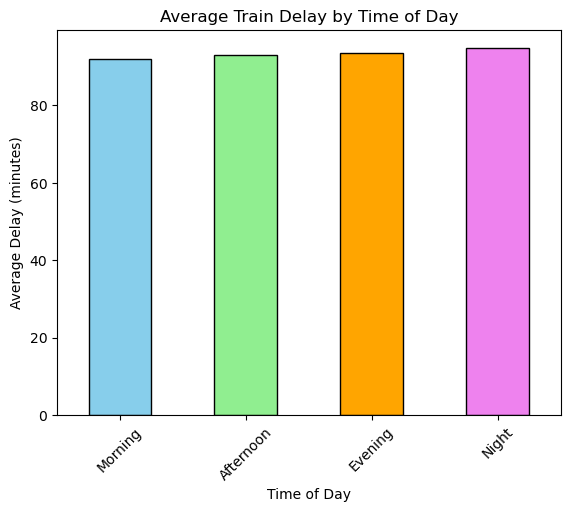

In [63]:
#1. What are the peak times for train delays based on the average delay by time of day?

# Ensure 'Time of Day' has ordered categories for consistent sorting
df['Time of Day'] = pd.Categorical(df['Time of Day'], 
                                   categories=["Morning", "Afternoon", "Evening", "Night"], 
                                   ordered=True)

plt.figure(figsize=(6.5, 5))
# Calculate the average delay by time period
avg_delay = df.groupby('Time of Day', observed=True)['Historical Delay (min)'].mean()

# check if avg delay has different values to plot
print(avg_delay)

# Bar Plot for clearer categorical comparison
avg_delay.plot(kind='bar',color=['skyblue', 'lightgreen', 'orange', 'violet'], edgecolor='black')
plt.title('Average Train Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


In [61]:
# inference 
This bar plot shows that train delays are longest at specific times of the day. 
This information can help plan ways to reduce delays during those busy times.

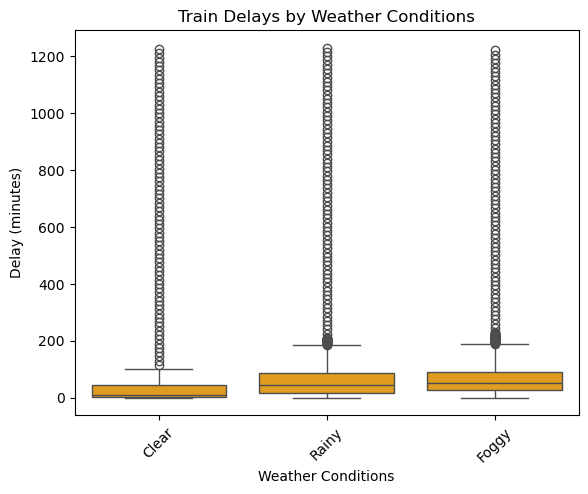

In [73]:
#2. How do weather conditions affect train delays?

# Create Box plot of weather conditions by train type

plt.figure(figsize=(6.5, 5))
sns.boxplot(x='Weather Conditions', y='Historical Delay (min)', data=df, color='orange')
plt.title('Train Delays by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


In [79]:
# inference
The box plot shows that train delays vary under different weather conditions. 
Certain weather types, like rain or fog, may lead to longer delays compared to clear weather. This suggests that weather has a noticeable impact on train punctuality, and extra precautions may be needed during challenging weather conditions.

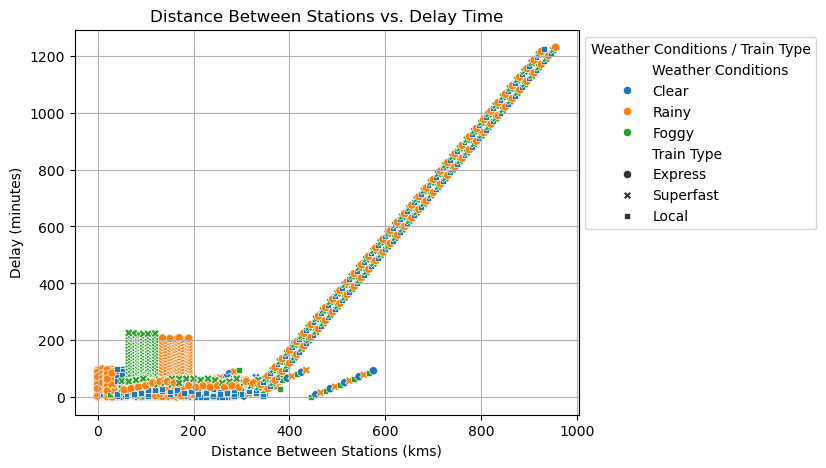

In [310]:
# 3. Is there a relationship between the distance between stations and delay times?

# create scatter plot of distance between stations and delay time

plt.figure(figsize=(6.5, 5))
sns.scatterplot(x='Distance Between Stations (km)', y="Historical Delay (min)",  hue ="Weather Conditions", style="Train Type", data=df, color ="purple")
plt.title('Distance Between Stations vs. Delay Time')
plt.xlabel('Distance Between Stations (kms)')
plt.ylabel('Delay (minutes)')
plt.legend(title = "Weather Conditions / Train Type", bbox_to_anchor=(1,1))
plt.grid()
plt.show()


In [83]:
# inference
The scatter plot shows that train delays don’t always increase with the distance between stations. 
Instead, delays seem to be affected more by weather and the type of train. This means that other factors, like weather, might cause more delays than distance alone.

Route Congestion
High      100.865344
Low       108.891465
Medium     70.671473
Name: Historical Delay (min), dtype: float64


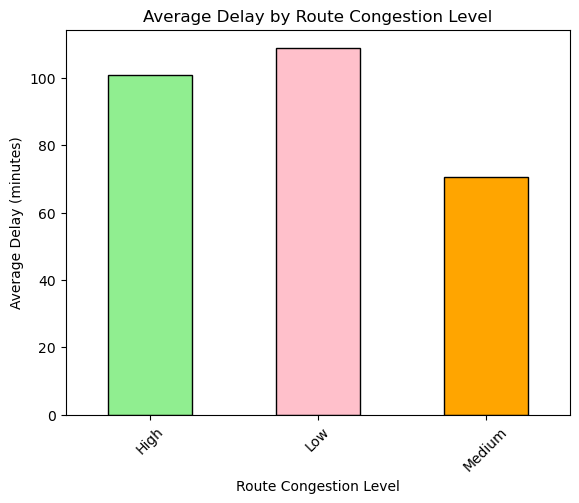

In [81]:
# 4. How does route congestion impact average train delays?

# create bar plot 

plt.figure(figsize=(6.5, 5))
avg_congestion_delay = df.groupby('Route Congestion')['Historical Delay (min)'].mean()
print(avg_congestion_delay)

avg_congestion_delay.plot(kind='bar', edgecolor='black', color=['lightgreen','pink','orange'])
plt.title('Average Delay by Route Congestion Level')
plt.xlabel('Route Congestion Level')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


In [87]:
# inference
The bar plot shows that higher route congestion levels are linked to longer average train delays. This suggests that congested routes lead to more delays, highlighting the importance of managing route congestion to improve train timings.

Train Type
Express      101.155136
Local         70.530256
Superfast    108.872497
Name: Historical Delay (min), dtype: float64


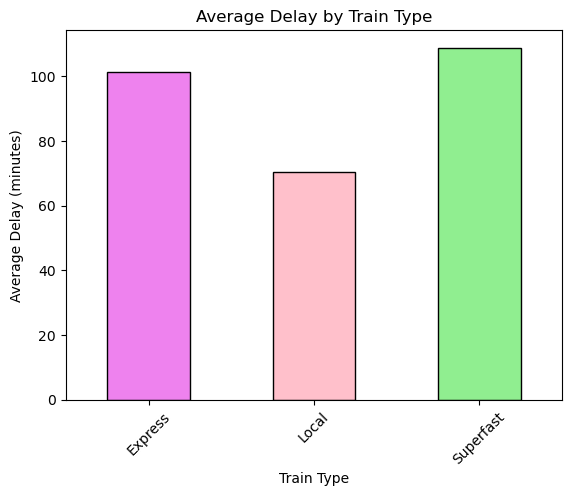

In [93]:
# 5. Which train types are most prone to delays?

avg_train_delay = df.groupby('Train Type')['Historical Delay (min)'].mean()
print(avg_train_delay)
avg_train_delay.plot(kind='bar', edgecolor = 'black', color=['violet','pink','lightgreen'])
plt.title('Average Delay by Train Type')
plt.xlabel('Train Type')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


In [91]:
# inference
The bar plot shows the average delays for different train types. Some train types experience longer delays than others, indicating that the type of train can impact punctuality. This information can help railway companies identify which train types may need more attention to improve on-time performance.

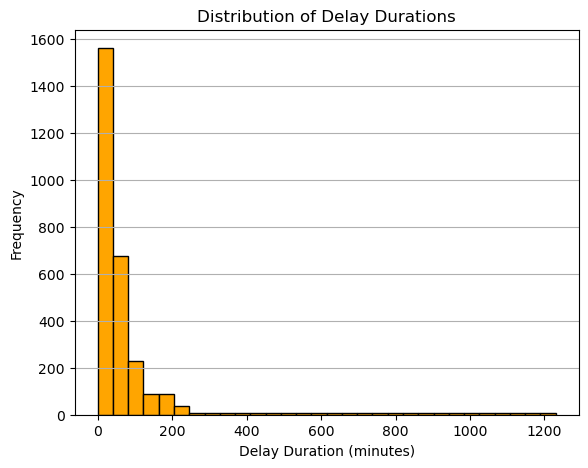

In [95]:
# 6. What does the histogram reveal about the frequency and range of train delay durations?

# Plotting the histogram
plt.figure(figsize=(6.5, 5))
plt.hist(df['Historical Delay (min)'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Delay Durations')
plt.xlabel('Delay Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


#inference
The histogram shows how often different delay durations happen. Most delays are short, but there are a few that are much longer. This means that while many trains are delayed for a little while, some trains experience really long delays that need more attention.


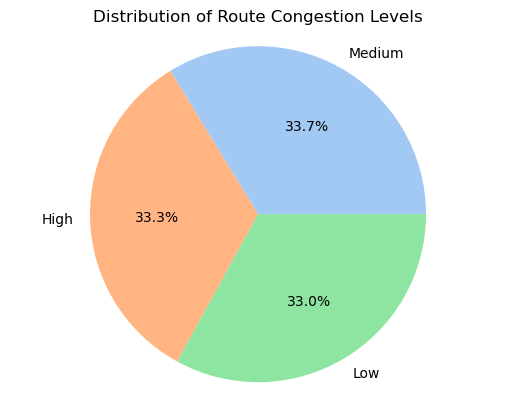

In [99]:
# 7.What is the distribution of route congestion levels, and how do they contribute to overall train delays?

# Create the pie chart
# plt.figure(figsize=(6.5, 5))
congestion_counts = df['Route Congestion'].value_counts()
plt.pie(congestion_counts, labels=congestion_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Route Congestion Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [107]:
# inference
This pie chart shows the distribution of different route congestion levels. 
Each segment represents the percentage of routes at various congestion levels, highlighting which congestion levels are most common. This information can help in understanding the overall traffic conditions on train routes and inform decisions on managing congestion effectively.

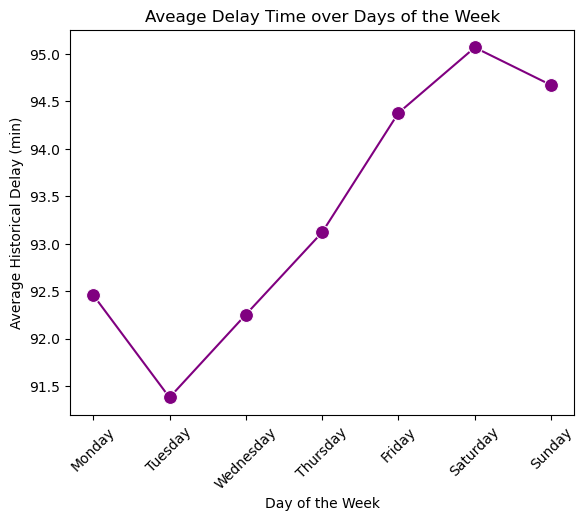

In [31]:
# 8. What are the trends in train delays over the days of the week?

# create line chart 

plt.figure(figsize=(6.5, 5))
# Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set "Day of the Week" as a categorical type with this order
df['Day of the Week'] = pd.Categorical(df['Day of the Week'], categories=day_order, ordered=True)


avg_delay_per_day = df.groupby("Day of the Week", observed =True)["Historical Delay (min)"].mean().reset_index()
sns.lineplot(x="Day of the Week", y="Historical Delay (min)", data = avg_delay_per_day, marker="o", markersize=10, color="purple")
plt.title("Aveage Delay Time over Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Historical Delay (min)")
plt.xticks(rotation=45)
plt.show()
             

In [159]:
# inference

The line plot illustrates the average train delay times across the days of the week. 
It shows that some days have longer average delays than others, indicating that train punctuality varies throughout the week. 
This information can help identify specific days that may require additional management to reduce delays.

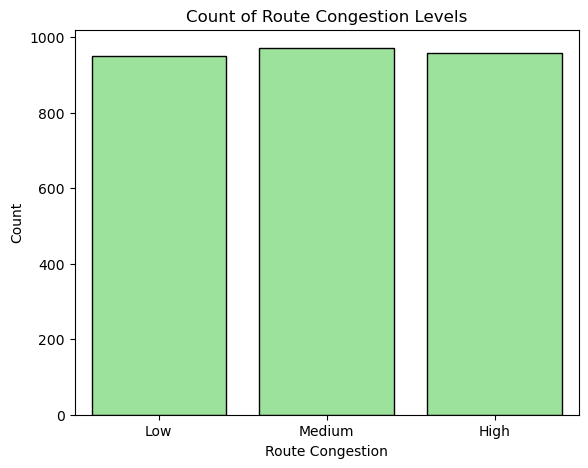

In [117]:
# 9.How many occurrences are there for each route congestion level?

# create count plot

plt.figure(figsize=(6.5, 5))
sns.countplot(x="Route Congestion", data=df ,color='lightgreen',  edgecolor='black')
plt.title("Count of Route Congestion Levels")
plt.xlabel("Route Congestion")
plt.ylabel("Count")
plt.show()


In [223]:
# inference
The count plot displays the number of occurrences for each route congestion level. It shows which congestion levels are most frequent and which are less common. This information can help in understanding traffic patterns and may guide strategies for improving train schedules and reducing congestion on busier routes.

<Figure size 650x500 with 0 Axes>

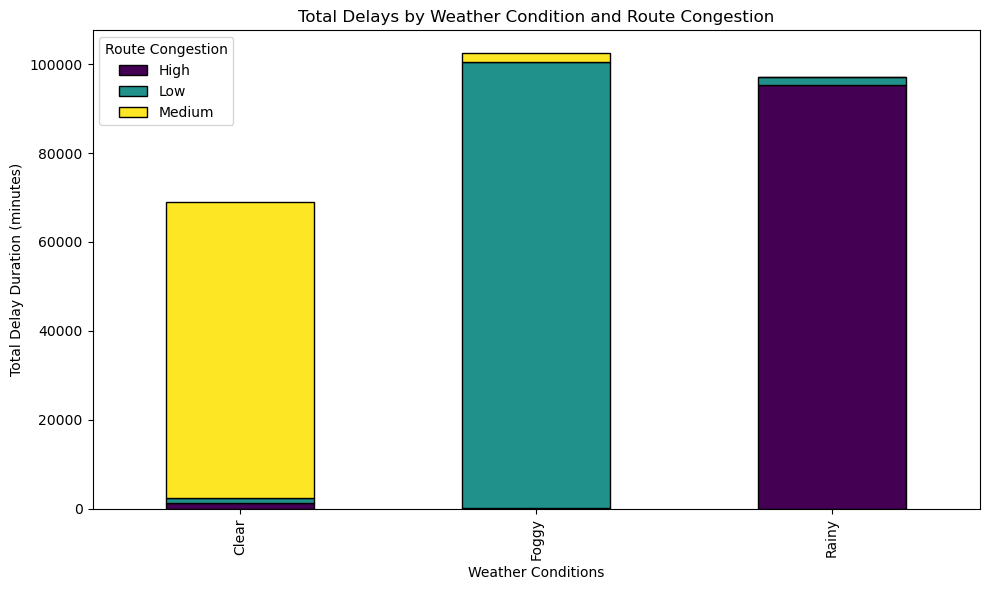

In [324]:
# 10.What is the total delay duration for each weather condition, and how is it affected by route congestion levels?

# Assuming you have a DataFrame where 'Weather Condition' and 'Route Congestion' are categorical variables
plt.figure(figsize=(6.5, 5))
grouped = df.groupby(['Weather Conditions', 'Route Congestion'])['Historical Delay (min)'].sum().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Total Delays by Weather Condition and Route Congestion')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Delay Duration (minutes)')
plt.legend(title='Route Congestion')
plt.tight_layout()
plt.show()


In [229]:
# inference
The stacked bar chart shows the total train delays for different weather conditions and levels of route congestion. It reveals that some weather conditions, especially when there is high congestion, lead to longer delays. This information can help train authorities find ways to improve schedules and reduce delays during bad weather and busy times.

In [ ]:
# Conclusion

The train delay analysis reveals several key insights: peak delays occur at specific times of day and under certain weather conditions, 
with longer delays associated with higher route congestion levels. Different train types experience varying delays, and while most delays are short, 
some are significantly longer. The distribution of congestion levels indicates a need for better management, especially on congested routes. 
Overall, addressing these factors—timing, weather, and congestion—can help improve train punctuality and enhance the overall travel experience.